# MNIST Handwritten Digit Recognizer using Deep CNN

Contributors:
- Krishnendu Adhikary (055022)
- Mohit Agarwal (055024)

## Problem Statement:

Handwritten digit recognition plays a vital role in real-world applications like postal mail sorting, bank check processing, and automated form digitization. However, conventional methods often struggle with the diversity in handwriting styles, resulting in inaccuracies. This project focuses on developing a Deep Convolutional Neural Network (CNN) to accurately classify handwritten digits, enhancing recognition efficiency and minimizing manual effort. By leveraging deep learning techniques, the model improves pattern detection and generalization, making it a robust solution for automated handwriting recognition systems in practical applications.

## Project Structure

1. Importing Libraries
2. Preparing the Dataset
3. Model Building
4. Model Fitting
5. Model Analysis
6. Predicting using test data


## Data Analysis  

### 1. Importing the Libraries  

- **TensorFlow v2** - An open-source machine learning framework developed by Google.  
- **Keras** - A high-level neural network library that runs on top of TensorFlow.  

### 2. Preparing the Dataset  

We utilized the **MNIST Handwritten Digit Recognition** dataset. The dataset was loaded into a **pandas DataFrame** using `read_csv`, allowing structured data manipulation. The label column was extracted and stored in `Y_kama22240428train`, serving as the target variable for training. The corresponding pixel values of handwritten digits were stored in `X_kama2224train` for model input.  

To analyze the class distribution, a **countplot** was generated, providing insights into the number of occurrences of each digit. Additionally, we checked for missing values to maintain data integrity before proceeding with preprocessing and model training.  

#### 2.1. Normalization  

To improve training efficiency, pixel values (ranging from **0 to 255**) were **scaled down to [0,1]** by dividing each value by 255. This transformation stabilizes gradient updates, reduces computational complexity, and enhances the model’s ability to detect patterns effectively.  

#### 2.2. Reshaping  

The pixel array was reshaped into a **(28,28,1) matrix**, ensuring compatibility with the **CNN input layer** designed for grayscale images of size 28x28.  

#### 2.3. Encoding  

The CNN model outputs predictions in a vector format, where each element represents the probability of a digit belonging to a specific class. To align with this format, the labels (digits) were **one-hot encoded**, enabling efficient learning and accurate classification.  

#### 2.4. Train-Test Split  

To evaluate model performance effectively, the dataset was divided into **training and validation sets**. The training set (`kama2224train`) was used for model learning, while the validation set assessed generalization on unseen data. Monitoring **validation accuracy and loss** helped identify issues like overfitting (when the model performs well on training data but poorly on new data) and underfitting (when the model fails to capture meaningful patterns). This approach ensures a well-balanced evaluation before final testing.  

### 3. Model Building  

A **Deep Convolutional Neural Network (CNN)** was implemented using the **LeNet-5 architecture**, originally proposed by Yann LeCun (1998). This architecture is well-suited for small-resolution image classification due to its efficiency and ease of training.  

#### **Model Structure:**  
*Input → [[Conv2D → ReLU] × 2 → MaxPool2D → Dropout] × 2 → Flatten → Dense → Dropout → Output*  

This design ensures **feature extraction, dimensionality reduction, and regularization**, preventing overfitting.  

#### **Data Augmentation:**  
Since deep learning models perform better with large datasets, **data augmentation** techniques such as **zooming, rotating, flipping, and cropping** were applied. These methods generated variations of existing images, improving the model’s ability to generalize across different handwriting styles.  

#### **Optimization Strategy:**  
- **RMSProp** was used to ensure faster and more stable convergence.  
- **ReduceLROnPlateau** dynamically adjusted the learning rate, preventing stagnation and improving model accuracy.  

### 4. Model Fitting  

The model was trained by fitting the dataset to the CNN architecture, allowing it to learn patterns and minimize errors. Since training deep learning models can be computationally expensive, **GPU support was enabled on Kaggle**, significantly accelerating the process and improving training efficiency.  

### 5. Prediction Using Test Data  

After training and evaluating the model, predictions were generated for the test dataset. The results were stored in a **CSV file** for submission in the competition.  


## Observations

### **Importing Libraries**  
- Successfully imported all required libraries, including TensorFlow, Keras, Pandas, and Matplotlib.  

### **Preparing the Dataset**  
- The MNIST dataset was loaded and preprocessed effectively.  
- The data was split into **training** and **validation** sets to enhance generalization.  
- A **countplot** verified a well-balanced distribution of digit classes.  
- No missing values were detected in the dataset.  
- Pixel values were **normalized from [0,255] to [0,1]**, improving training efficiency.  

### **Model Building**  
- The **LeNet-5 architecture** was chosen for its simplicity and efficiency in digit recognition.  
- The model comprised **convolutional layers, pooling layers, dropout layers**, and a **fully connected output layer**.  
- **Data Augmentation** was applied to expand the dataset artificially and improve generalization.  
- The **RMSProp optimizer** facilitated better convergence, while **ReduceLROnPlateau** dynamically adjusted the learning rate.  

### **Model Fitting**  
- Training was performed on Kaggle with **GPU acceleration**, significantly reducing computation time.  
- Loss and accuracy values showed consistent improvement across epochs.  
- Training and validation losses were closely monitored to prevent overfitting.  

### **Model Analysis**  
- The **learning curve** demonstrated a steady decline in both training and validation losses, confirming effective learning.  
- The **confusion matrix** highlighted strong model performance across most digit classes, with minor misclassifications.  
- Although accuracy was high, some errors indicated areas for further improvement.  

### **Predicting Using Test Data**  
- The trained model was used to generate predictions on the test dataset.  
- Results were saved in a **CSV file** for competition submission.  
- The final model delivered robust performance, with predictions closely matching validation accuracy.  


## Managerial Insights  

- **Automation Potential**:  
  The CNN model demonstrates high accuracy in classifying handwritten digits, making it a reliable choice for **automated data entry systems** in sectors like banking, postal services, and form digitization. This automation can significantly minimize manual errors and enhance processing efficiency.  

- **Cost-Effectiveness**:  
  Leveraging **deep learning-based recognition** helps organizations reduce labor expenses associated with manual digit transcription. Furthermore, **data augmentation** enhances model performance without the need for extensive datasets, lowering data acquisition costs.  

- **Scalability & Adaptability**:  
  The model can be fine-tuned to recognize characters in **various languages and handwritten scripts**, extending its applications to industries such as finance, healthcare, and government document processing.  

- **Performance vs. Infrastructure**:  
  While CNNs offer high accuracy, they require **computational resources** like GPUs. Organizations can utilize cloud-based AI services to **optimize cost and performance**, ensuring scalable deployment.  

- **Error Handling & Continuous Improvement**:  
  The confusion matrix reveals misclassifications, highlighting potential biases in specific digits. Integrating **active learning** and retraining the model with **updated data** over time can enhance its accuracy.  

- **Strategic Decision-Making**:  
  Companies evaluating AI-driven handwriting recognition should assess **data availability, infrastructure capabilities, and compliance requirements** before implementation. The model’s strong performance in digit recognition supports a compelling **business case** for AI-driven process automation.  


## 1. Importing the Libraries

In [34]:
!pip install tensorflow

In [35]:
# Importing Tensorflow and keras

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

TensorFlow Version:   2.18.0
Keras Version:   3.8.0


## 2. Preparing the Dataset

In [36]:
# Train Data

import pandas as pd
!pip install gdown
!gdown 1rU-I_dvBEgOjlM9k-y2M6PhHt5hUiapq

try:
  kama2224train = pd.read_csv("mnist_train.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1rU-I_dvBEgOjlM9k-y2M6PhHt5hUiapq
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:01<00:00, 62.2MB/s]
File imported successfully


In [37]:
# Test Data

!pip install gdown

!gdown 1y3V3wwDc_xKjzk5fH5RIHuFYoNCpeVh9

try:
  kama2224test = pd.read_csv("test.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1y3V3wwDc_xKjzk5fH5RIHuFYoNCpeVh9
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 95.5MB/s]
File imported successfully


In [38]:
Y_kama2224train = kama2224train['label']

#Dropping Label Column
X_kama2224train = kama2224train.drop(labels=['label'],axis=1)

#free up some space
del kama2224train

Y_kama2224train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [39]:
#Checking for any null or missing values
X_kama2224train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [40]:
kama2224test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


### Normalisation

In [41]:
X_kama2224train = X_kama2224train/255
kama2224test = kama2224test/255

### Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.

In [42]:
X_kama2224train = X_kama2224train.values.reshape(-1,28,28,1)

In [43]:
kama2224test = kama2224test.values.reshape(-1,28,28,1)

### Label Encoding

In [44]:
Y_kama2224train = tf.keras.utils.to_categorical(Y_kama2224train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

### Train and Validation Data Split


In [45]:
#Spliting kama2224train
X_kama2224train,X_val,Y_kama2224train,Y_val = train_test_split(X_kama2224train,Y_kama2224train,test_size=0.1,
                                                random_state = 55022024)

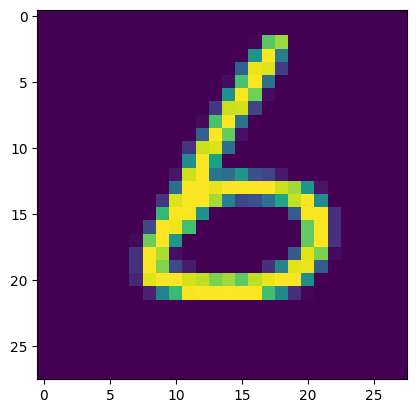

In [46]:
#An image sample

g = plt.imshow(X_kama2224train[0][:,:,0])

## 3. Model Building

In [47]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
kama2224_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [49]:
#Compiling Model

model.compile(optimizer = kama2224_optimizer, loss='categorical_crossentropy',
             metrics=["accuracy"])

In [50]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [51]:
kama2224_epochs=10
kama2224_batch_size = 112

In [52]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_kama2224train)

## 4. Model Fitting

In [53]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.")
else:
    print("CUDA not Available.")

CUDA Available.


In [54]:
#Fitting the model
# Commenting it since no need to run it again

history = model.fit(datagen.flow(X_kama2224train, Y_kama2224train, batch_size=kama2224_batch_size),
                    epochs=kama2224_epochs,
                    validation_data=(X_val, Y_val),
                    verbose=2,
                    steps_per_epoch=X_kama2224train.shape[0] // kama2224_batch_size,
                    callbacks=[learning_rate_reduction])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


337/337 - 20s - 60ms/step - accuracy: 0.8687 - loss: 0.4044 - val_accuracy: 0.9771 - val_loss: 0.0793 - learning_rate: 1.0000e-03
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 0s - 1ms/step - accuracy: 0.9643 - loss: 0.2693 - val_accuracy: 0.9814 - val_loss: 0.0632 - learning_rate: 1.0000e-03
Epoch 3/10
337/337 - 25s - 74ms/step - accuracy: 0.9648 - loss: 0.1144 - val_accuracy: 0.9857 - val_loss: 0.0438 - learning_rate: 1.0000e-03
Epoch 4/10
337/337 - 0s - 1ms/step - accuracy: 0.9911 - loss: 0.0390 - val_accuracy: 0.9874 - val_loss: 0.0382 - learning_rate: 1.0000e-03
Epoch 5/10
337/337 - 12s - 35ms/step - accuracy: 0.9738 - loss: 0.0873 - val_accuracy: 0.9840 - val_loss: 0.0563 - learning_rate: 1.0000e-03
Epoch 6/10
337/337 - 0s - 1ms/step - accuracy: 0.9286 - loss: 0.2238 - val_accuracy: 0.9762 - val_loss: 0.0697 - learning_rate: 1.0000e-03
Epoch 7/10
337/337 - 12s - 35ms/step - accuracy: 0.9795 - loss: 0.0670 - val_accuracy: 0.9890 - val_loss: 0.0327 - learning_rate: 1.0000e-03
Epoch 8/10
337/337 - 0s - 1ms/step - accuracy: 0.9911 - loss: 0.0370 - val_accuracy: 0.9905 - val_loss: 0.0338 - learning_rate: 1.0000e-03
Epoch 9/10
337/337 - 20s - 59ms/

In [55]:
# Saving the model for further faster processing

model.save("CNNmodel.keras", include_optimizer = True)

In [56]:
from tensorflow.keras.models import load_model

# Define a custom object to map 'softmax_v2' to 'softmax'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}
cnn_model = load_model("CNNmodel.keras", custom_objects=custom_objects)

## 5. Analyzing the model

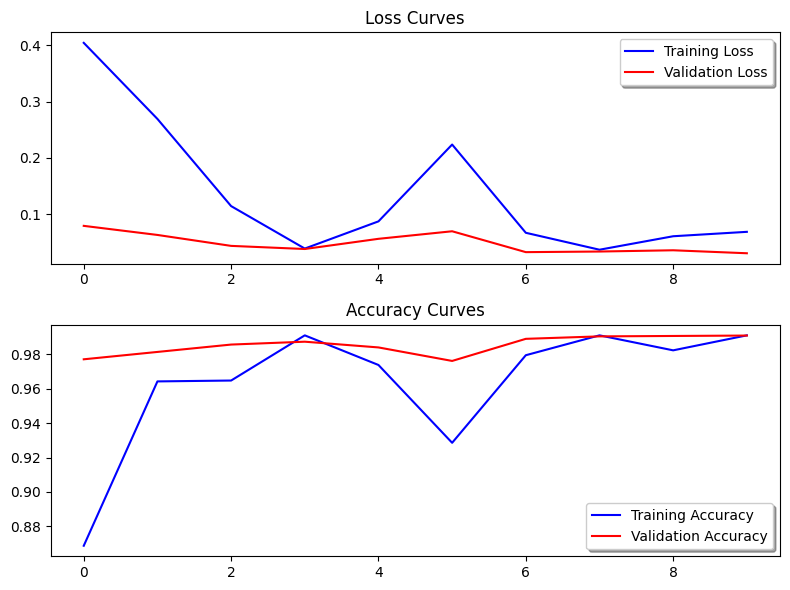

In [57]:
# The loss and accuracy curves for training and validation

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Loss Curves')

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Accuracy Curves')

plt.tight_layout()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


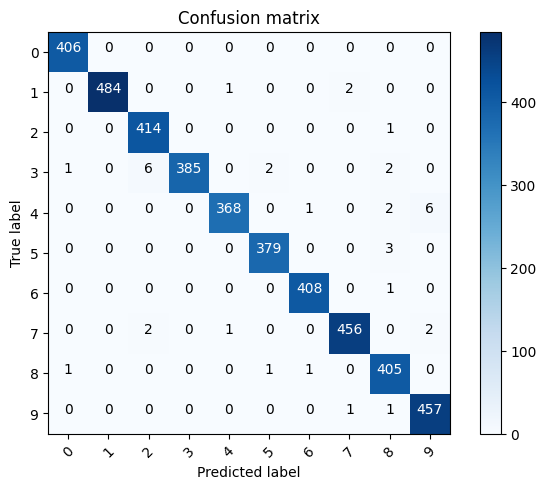

In [58]:
# plotting confussion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

### Important Error

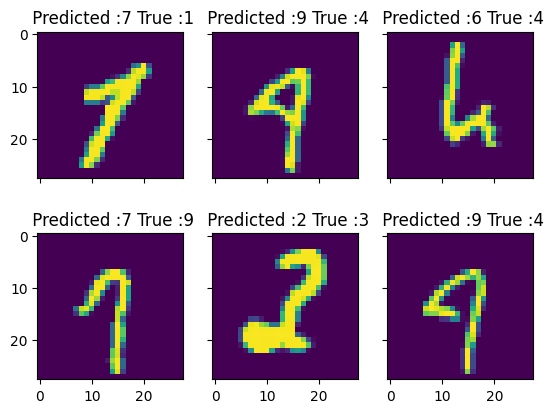

In [59]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Predicting the test data

In [60]:
# predict results
results = cnn_model.predict(kama2224test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


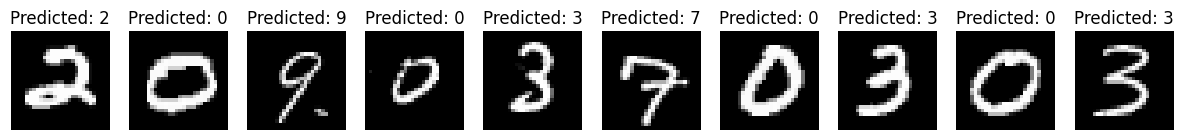

In [61]:
import matplotlib.pyplot as plt

# Assuming 'results' contains predicted labels and 'kama2224test' contains test images
# Select a subset of images to display (e.g., the first 10)
num_images_to_display = 10
images = kama2224test[:num_images_to_display]
predicted_labels = results[:num_images_to_display]

# Create a figure and axes for the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate through the images and display them with their predicted labels
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    ax.set_title(f"Predicted: {predicted_labels[i]}")  # Set the title with the predicted label
    ax.axis('off')  # Turn off the axes

plt.show()  # Show the figure

In [62]:
import os
import numpy as np
from PIL import Image
import zipfile

# Create a ZIP file to store the images
output_zip = 'predicted_images.zip'

# Open a new ZIP file in write mode
with zipfile.ZipFile(output_zip, 'w') as zipf:
    # Iterate through the test images and save them with predicted labels
    for i, image in enumerate(kama2224test):
        predicted_label = results[i]  # Get the predicted label for the current image
        image_data = (image.reshape(28, 28) * 255).astype(np.uint8)  # Reshape and scale to 0-255
        image = Image.fromarray(image_data, mode='L')  # Create a PIL Image object

        # Generate a temporary filename with .jpg extension
        image_filename = f'image_{i}_predicted_{predicted_label}.jpg'

        # Save the image as JPG
        image.save(image_filename, format='JPEG')

        # Add the file to the ZIP archive
        zipf.write(image_filename)

        # Remove the temporary file
        os.remove(image_filename)

print(f"Images saved to '{output_zip}' file.")


Images saved to 'predicted_images.zip' file.


In [63]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)